### Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. 
To build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# importing the dataset 
df_train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# importing the test dataset 
df_test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

In [ ]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [ ]:
# merge both train and test dataset 
df = df_train.append(df_test)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
# to check size of the dataset
df.shape

(783667, 12)

In [ ]:
# to display the columns of the dataset
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_1',
       'Product_2', 'Product_3', 'Purchase'],
      dtype='object')

In [ ]:
# to check what types of columns we are having

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_1                   783667 non-null  int64  
 9   Product_2                   537685 non-null  float64
 10  Product_3                   237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_1,Product_2,Product_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
# as user id is not important we are droping it 
df.drop('User_ID',axis = 1,inplace = True)

In [ ]:
# user id columns has been removed 
df.shape

(783667, 11)

In [ ]:
# their is no user id in our dataset
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Data Preprocessing
1. Handling missing values
2. Converting the categorical variables into numerical variables
3. Visualization

### Handling Categorical Variables

In [ ]:

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_1                          0
Product_2                     245982
Product_3                     545809
Purchase                      233599
dtype: int64

In [ ]:
df.shape

(783667, 11)

In [ ]:
# handling categorical variables
df['Gender'] = df['Gender'].map({'M':0,'F':1})

In [ ]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,1,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,1,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,1,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [ ]:
df['Age'].value_counts(sort=False)

0-17      21334
55+       30579
26-35    313015
46-50     65278
51-55     54784
36-45    156724
18-25    141953
Name: Age, dtype: int64

In [ ]:
# handling age columns
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [ ]:
# converting  a categorcial variable into numerical variable so that algo can understand
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [ ]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [ ]:
# combing both actual dataset and city
df = pd.concat([df,df_city],axis  = 1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase,B,C
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.drop('City_Category',axis = 1,inplace = True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
# replace 4+ with 4
df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:

df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,4,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_1                   783667 non-null  int64  
 7   Product_2                   537685 non-null  float64
 8   Product_3                   237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


#### converting an object into  an integer

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_1                   783667 non-null  int64  
 7   Product_2                   537685 non-null  float64
 8   Product_3                   237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [ ]:
# there are B and C two columns are uint8 converting them into integer
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_1                   783667 non-null  int64  
 7   Product_2                   537685 non-null  float64
 8   Product_3                   237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


### Handling Missing Values

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_1                          0
Product_2                     245982
Product_3                     545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

observation:- Product_2, Product_3 has missing values we need to handle

In [ ]:
df['Product_1'].unique()
# discrete features

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
df['Product_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_2, dtype: int64

In [ ]:
## the best is to replace missing value with 'mode'
df['Product_2'].mode()
# getting two values that is index and values i need to drop the index

0    8.0
dtype: float64

In [ ]:
df['Product_2'].mode()[0]

8.0

In [ ]:
df['Product_2'] = df['Product_2'].fillna(df['Product_2'].mode()[0])

In [ ]:
df['Product_2'].isnull().sum()

0

Observation:- no missing values 

In [ ]:
# similarly for product_3 
df['Product_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_3, dtype: int64

In [ ]:
df['Product_3'] = df['Product_3'].fillna(df['Product_3'].mode()[0])

In [ ]:
df['Product_3'].isnull().sum()

0

In [ ]:
df.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_1                          0
Product_2                          0
Product_3                          0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Visualization

In [ ]:
import seaborn as sns

In [ ]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_1',
       'Product_2', 'Product_3', 'Purchase', 'B', 'C'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


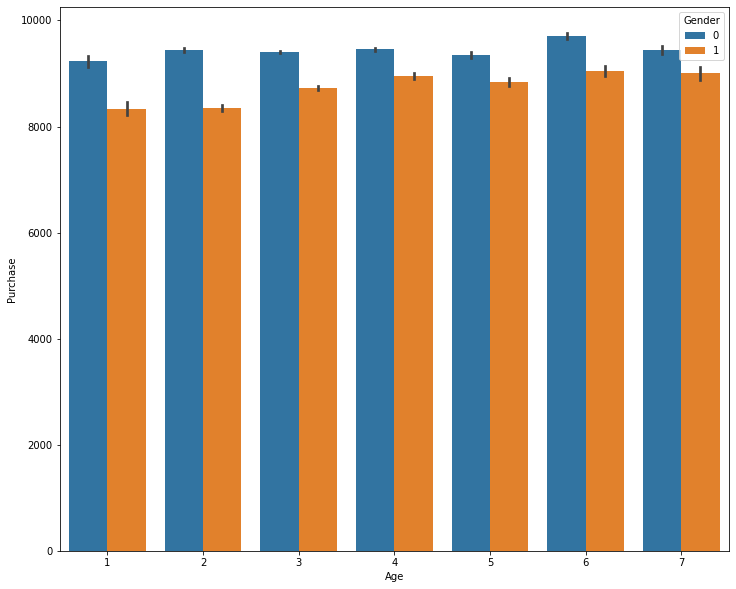

In [ ]:
# let us compare age and purchase w.r.t gender
plt.figure(figsize=(12,10))
sns.barplot('Age','Purchase',hue = 'Gender',data = df)

-> 1 female and 0 male
1. observation :- Males has more purchase compare to Female 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


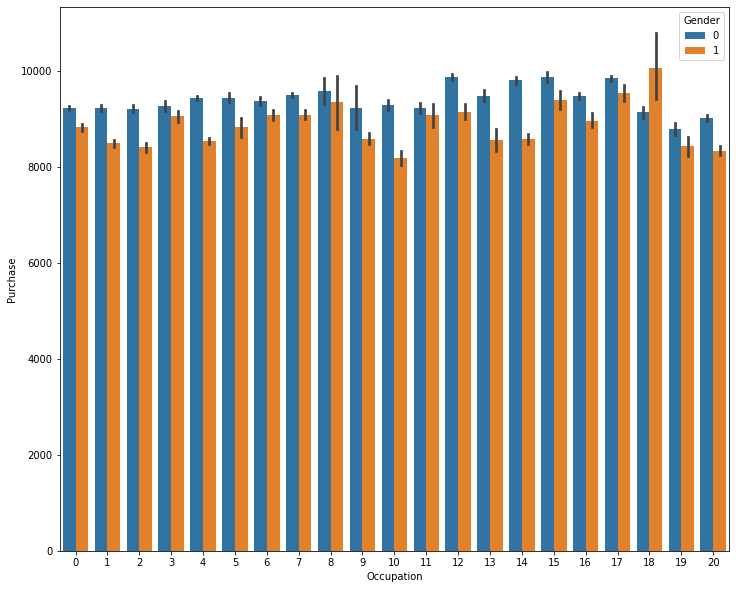

In [ ]:
# with occupation
plt.figure(figsize=(12,10))
sns.barplot('Occupation','Purchase',hue = 'Gender',data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


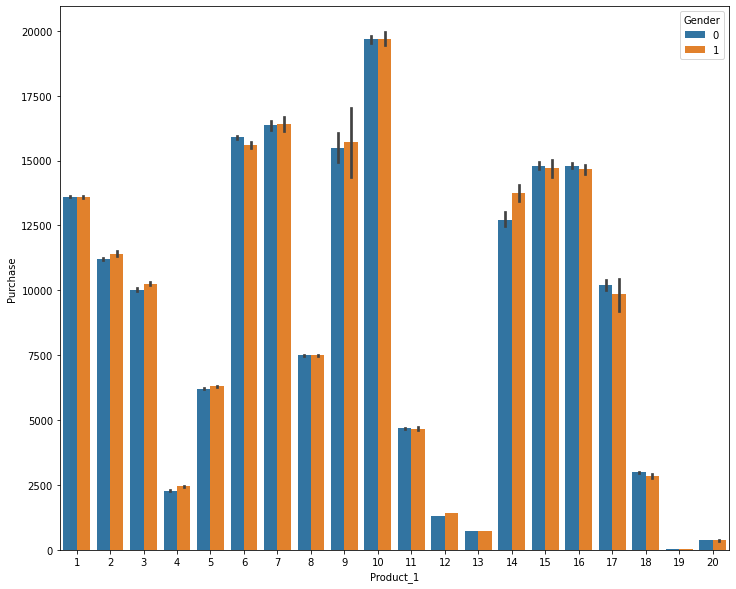

In [ ]:
# comapring product category 
plt.figure(figsize=(12,10))
sns.barplot('Product_1','Purchase',hue = 'Gender',data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


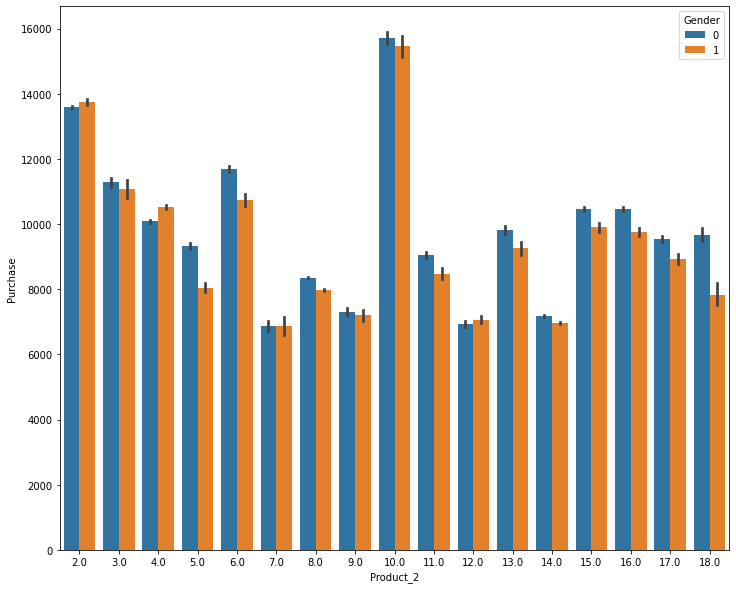

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot('Product_2','Purchase',hue = 'Gender',data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


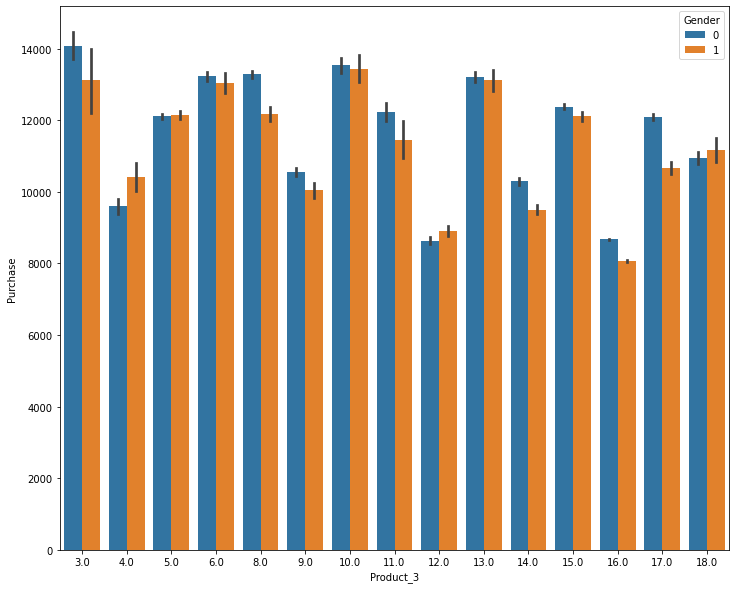

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot('Product_3','Purchase',hue = 'Gender',data = df)

In [ ]:
# product_1 is bought the most of them all


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
# drop product id
df.drop('Product_ID',axis = 1,inplace = True)

In [ ]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase,B,C
0,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,0,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
df.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase,B,C
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000,783667.000000,783667.000000
mean,0.24709,3.496802,8.079300,1.858247,0.409777,5.366196,9.265541,14.988858,9263.968713,0.420764,0.310954
std,0.43132,1.352736,6.522206,1.288790,0.491793,3.878160,4.301427,2.740792,5023.065394,0.493682,0.462884
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,0.00000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,0.00000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,0.00000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.00000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [ ]:
## scaling
# where their is null in the purchase is for test
df_test = df[df['Purchase'].isnull()]

In [ ]:
df_train = df[~df['Purchase'].isnull()]

In [ ]:
y = df_train['Purchase']

In [ ]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [ ]:
X = df_train.drop('Purchase',axis = 1)

In [ ]:
X.shape

(550068, 10)

In [ ]:
y.shape

(550068,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [-0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [ 1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [ ]:
X_test

array([[-0.57141282,  1.84716932,  1.67542193, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 1.75004823,  0.37105599,  0.44863199, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 1.75004823,  0.37105599, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       ...,
       [-0.57141282, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [-0.57141282,  0.37105599, -0.16476299, ...,  0.00373169,
        -0.85056064,  1.48627336],
       [-0.57141282, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374]])

### Training the model


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor()

In [ ]:
regr_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regr_1.predict(X_test)

In [ ]:
y_pred

array([15623.    , 19245.    ,  5670.    , ...,  7981.    , 13018.4375,
       16160.875 ])

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 11131128.04792036


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 2360.9704467791366


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test, y_pred))

MAPE 0.34599831075748866


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 3336.3345227840027


In [ ]:
regr_1.score(X_test,y_test)

0.5583339302056636

In [ ]:
regr_1.score(X_train,y_train)

0.7983631647792537

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(X_train,y_train)

0.787501766848856

In [ ]:
ypred = rf.predict(X_test)

In [ ]:
ypred

array([13883.42383333, 14919.0855563 ,  6687.16047222, ...,
       11673.29047866, 12996.73872993, 16214.62815349])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test, ypred))

MAPE 0.3318042706411028


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,ypred))

MAE 2227.151604120472


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,ypred))

MSE 9346730.87774819


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# let's define each parameters in the random forest 
# para-1:- n_estimators no of tree in random forest i.e 10 trees or 20 trees so on. 
# with the help of linspace and for loop we can select how trees it requires for accuracy
n_estimators = [int(x) for x in np.linspace(start=100,stop = 2000,num =10)]
# start with 200 trees to 2000 trees with 10 splits

# para-2:- max_features
# the maximum number of features Random Forest is allowed to try in individual tree.

max_features = ['auto','sqrt','log2']
# auto: This will simply take all the features which make sense in every tree
# sqrt: square root of the features

#para-3:- max_depth 
# maximum number of levels in tree, how depth should tree go 

max_depth = [int(x) for x in np.linspace(start=10,stop = 1000,num=10)]

#para-4:- min_samples_split
# minium number of splits i.e 2 splits three splits, basically considering a combination of it
min_samples_split = [1,2,3,4,5,6,7,8,9]

#para-5 min_samples_leaf
# i.e minimum number of leaf nodes 
min_samples_leaf = [1,2,4,6,8]

# create a random search cv and the parameters are given in keyvalue pair

random_grid = { 'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : ['squared_error', 'absolute_error', 'poisson']}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [ ]:
rf = RandomForestRegressor(   )
# RandomizedsearchCv has following parameters
# estimator we define type of algorithm
# param_distributions: parameters of the algorithm
# n_iter: 100 different iteration
# cv : cross validation
# verbose = 2
# n_jobs: cores of the cpu we are using
# random_state

rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,n_iter = 100,cv = 3,
                                verbose = 1,random_state=42,n_jobs=-1)

rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
